In [8]:
import numpy as np
import torch
import torch.nn as nn

from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
# Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [10]:
n_samples, n_features = X.shape
n_samples, n_features 

(100, 1)

In [11]:
# Model 
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [15]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [16]:
# Trainin loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [100/1000], Loss: 332.6072
Epoch [200/1000], Loss: 332.5676
Epoch [300/1000], Loss: 332.5676
Epoch [400/1000], Loss: 332.5676
Epoch [500/1000], Loss: 332.5676
Epoch [600/1000], Loss: 332.5676
Epoch [700/1000], Loss: 332.5676
Epoch [800/1000], Loss: 332.5676
Epoch [900/1000], Loss: 332.5676
Epoch [1000/1000], Loss: 332.5676


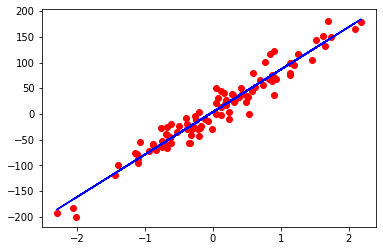

In [17]:
# Plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro', label='Original data')
plt.plot(X_numpy, predicted, 'b', label='Fitted line')
plt.show()